In [58]:
import pandas as pd
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat
import torch
from src.EuroSat_dataloaders import transformation_eurosat

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [19]:
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


# Grad Cam

## ResNet50

#### Noise combined scale 0.5

In [20]:
import pandas as pd

df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,1.025495,0.014888,5.951896e-11,0.910814,0.929435
1,0.197505,-0.009667,1.051684e-04,0.581134,-0.120357
2,1.212512,0.136604,1.280991e-10,0.904795,0.911458
3,-0.616348,-0.328657,2.977074e-13,0.233239,-0.344545
4,0.087711,-0.153914,1.364771e-09,0.518455,-0.152712


In [21]:
df.mean()

NSS    0.827771
IG     0.120006
MSE    0.065101
SIM    0.857331
CC     0.671382
dtype: float64

<AxesSubplot: >

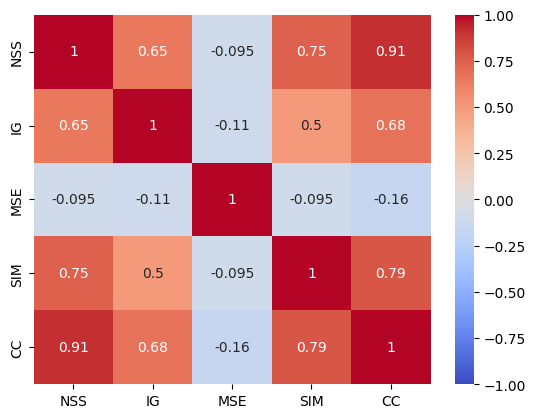

In [22]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise combined scale 1

In [23]:
import pandas as pd

df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.543627,0.043288,2.820679e-08,0.801758,0.260269
1,-0.170011,-0.173656,2.775760e-03,0.770867,-0.184750
2,0.517567,-0.024635,4.849911e-08,0.871931,0.218966
3,-1.683102,-0.503735,3.165923e-11,0.273876,-0.644568
4,-0.674115,-0.199004,5.499439e-08,0.440729,-0.449403


In [24]:
df.mean()

NSS    0.551530
IG     0.062042
MSE    0.198650
SIM    0.818749
CC     0.412728
dtype: float64

<AxesSubplot: >

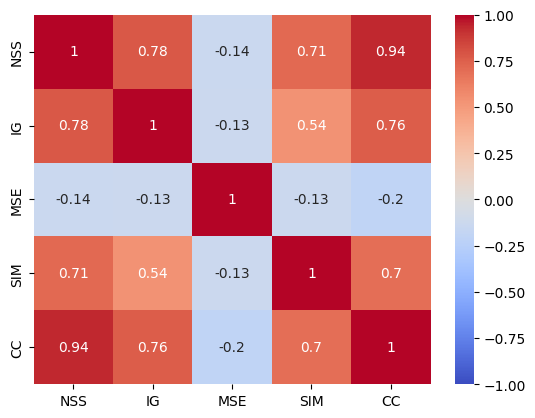

In [25]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 0.5

In [26]:
df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,1.098621,0.091816,8.521549e-11,0.867845,0.913638
1,0.410071,-0.030291,3.042655e-05,0.705058,0.023185
2,1.180459,0.104723,1.186564e-10,0.918726,0.895836
3,-0.915750,-0.361966,4.581365e-13,0.228874,-0.418127
4,0.159457,-0.145799,2.712830e-10,0.534837,-0.111735


In [27]:
df.mean()

NSS    0.828233
IG     0.120158
MSE    0.063474
SIM    0.857624
CC     0.671317
dtype: float64

<AxesSubplot: >

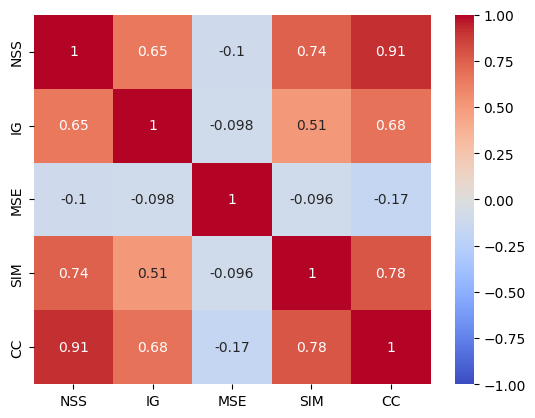

In [28]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1

In [29]:
import pandas as pd

df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.721098,0.098528,4.869162e-09,0.770687,0.324806
1,-0.061895,-0.162204,7.365414e-05,0.785375,-0.133801
2,0.462491,-0.054852,7.021536e-08,0.852220,0.134156
3,-1.702837,-0.501111,5.129201e-11,0.274035,-0.648516
4,-0.609068,-0.201994,2.993385e-08,0.486846,-0.419202


In [30]:
df.mean()

NSS    0.548708
IG     0.060998
MSE    0.201666
SIM    0.817917
CC     0.409876
dtype: float64

<AxesSubplot: >

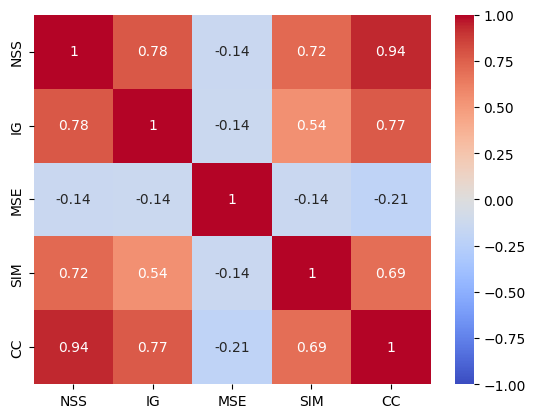

In [31]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

## VGG-16

#### Noise combined scale 0.5

In [32]:
import pandas as pd

df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.933809,0.281447,8.537472e-19,0.732940,0.582237
1,0.519270,0.309129,9.324441e-18,0.243224,0.400210
2,1.366455,0.403945,1.722154e-04,0.920560,0.840187
3,0.000000,0.000000,NaN,1.000000,0.000000
4,0.000000,0.000000,NaN,1.000000,0.000000


In [33]:
df.mean()

NSS    0.354408
IG     0.103833
MSE    0.281435
SIM    0.794425
CC     0.235166
dtype: float64

<AxesSubplot: >

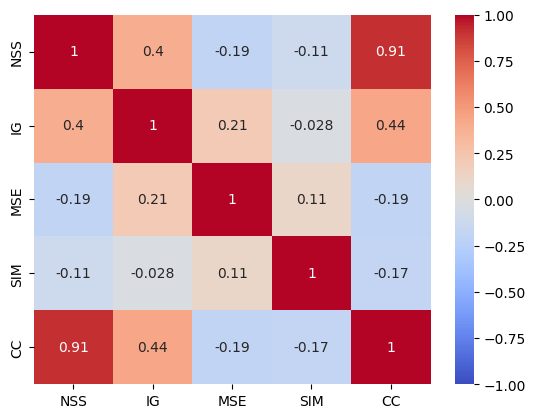

In [34]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise combined scale 0.5

In [53]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.933809,0.281447,8.537472e-19,0.732940,0.582237
1,0.519270,0.309129,9.324441e-18,0.243224,0.400210
2,1.366455,0.403945,1.722154e-04,0.920560,0.840187
3,0.000000,0.000000,NaN,1.000000,0.000000
4,0.000000,0.000000,NaN,1.000000,0.000000


In [54]:
df.mean()

NSS    0.354408
IG     0.103833
MSE    0.281435
SIM    0.794425
CC     0.235166
dtype: float64

<AxesSubplot: >

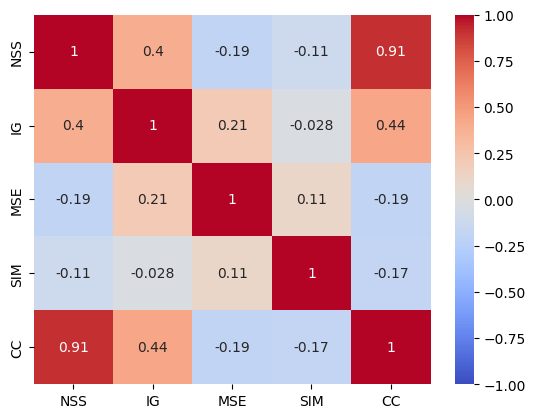

In [55]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise combined scale 1

In [35]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.670412,0.211603,1.402202e-21,0.777523,0.278216
1,-0.235732,0.110422,1.998742e+00,0.422652,-0.133635
2,-0.092606,0.111531,1.999980e+00,0.811902,-0.138244
3,0.000000,0.000000,NaN,1.000000,0.000000
4,0.000000,0.000000,NaN,1.000000,0.000000


In [36]:
df.mean()

NSS    0.143508
IG     0.080410
MSE    0.526013
SIM    0.775622
CC     0.091864
dtype: float64

<AxesSubplot: >

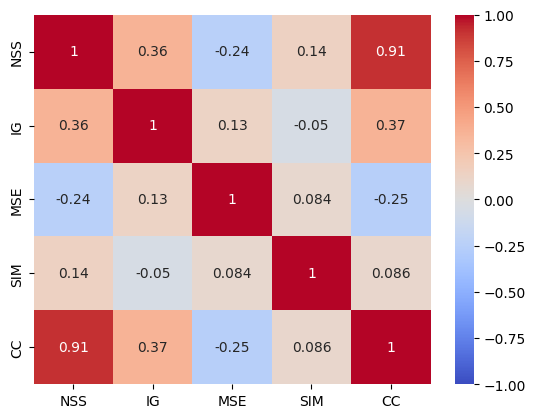

In [37]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1

In [38]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,1.012048,0.174998,1.430529e-26,0.705596,0.575393
1,-0.144984,0.259155,2.042038e-04,0.240573,-0.059198
2,0.000965,0.133340,1.998114e+00,0.791195,-0.095092
3,0.000000,0.000000,NaN,1.000000,0.000000
4,0.000000,0.000000,NaN,1.000000,0.000000


In [39]:
df.mean()

NSS    0.140445
IG     0.078715
MSE    0.524859
SIM    0.777115
CC     0.088038
dtype: float64

<AxesSubplot: >

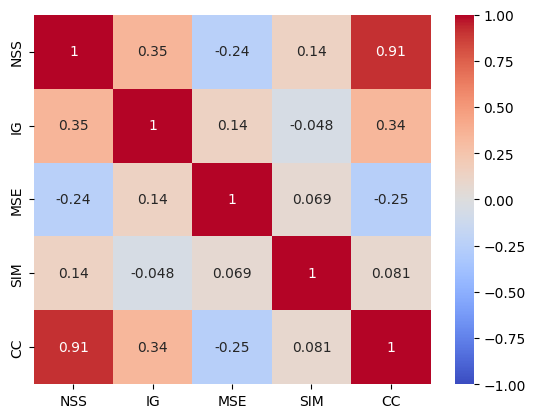

In [40]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1.5

In [50]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,-0.822803,0.099892,1.911537,0.232741,-0.410044
1,-0.642275,0.051688,0.500198,0.368005,-0.397677
2,-0.120983,0.116019,1.999834,0.812859,-0.148188
3,0.000000,0.000000,NaN,1.000000,0.000000
4,0.000000,0.000000,NaN,1.000000,0.000000


In [51]:
df.mean()

NSS    0.041792
IG     0.066654
MSE    0.782456
SIM    0.756901
CC     0.033421
dtype: float64

<AxesSubplot: >

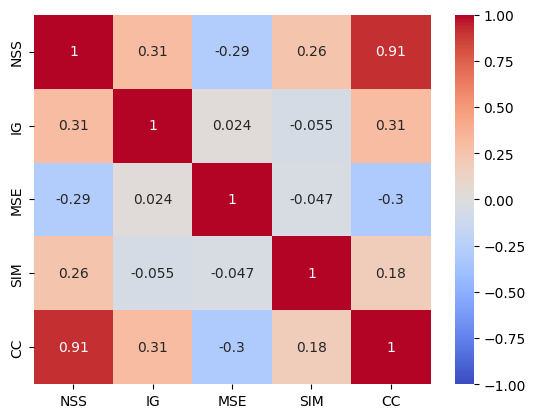

In [52]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

# Grad Cam ++

## VGG-16

#### Noise inverted scale 0.5

In [41]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.775027,0.093117,1.140985e+00,0.861268,0.671643
1,1.133232,0.251451,2.000000e+00,0.646684,0.878372
2,0.971583,0.327894,8.595132e-04,0.755481,0.894232
3,1.084979,0.174727,2.946058e-33,0.807657,0.877808
4,0.706170,0.060350,2.000000e+00,0.767279,0.654843


In [42]:
df.mean()

NSS    0.765482
IG     0.153362
MSE    0.350133
SIM    0.807403
CC     0.712704
dtype: float64

<AxesSubplot: >

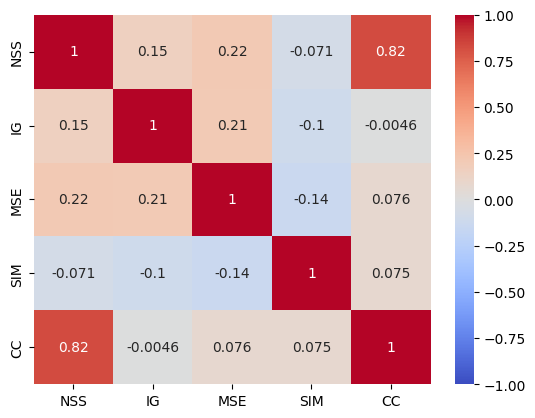

In [43]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1

In [44]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.815079,0.163611,1.999853e+00,0.914581,0.721173
1,1.025808,0.268581,2.000000e+00,0.586794,0.777125
2,0.919415,0.249500,1.128887e-01,0.806441,0.747038
3,1.001052,0.272307,8.850220e-08,0.616171,0.767310
4,0.558269,0.010535,2.000000e+00,0.788445,0.528438


In [45]:
df.mean()

NSS    0.607542
IG     0.128241
MSE    0.640901
SIM    0.775966
CC     0.564585
dtype: float64

<AxesSubplot: >

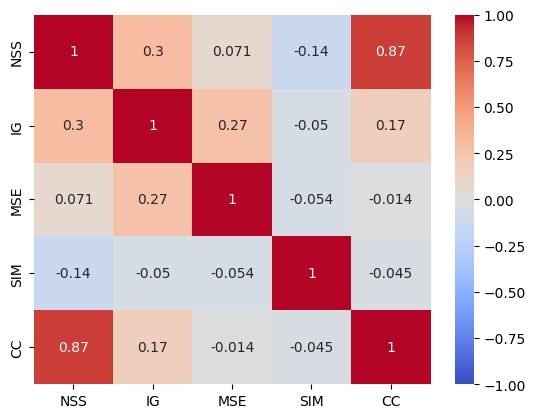

In [46]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

# Noise statistics

### Resnet Grad Cam

In [66]:
df_c_05_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df_c_10_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_1.csv")
df_c_15_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_1_5.csv")

In [63]:
df_i_05_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_0_5.csv")
df_i_10_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_1.csv")
df_i_15_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_1_5.csv")

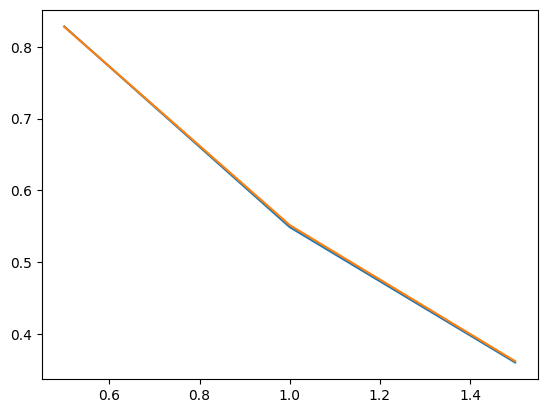

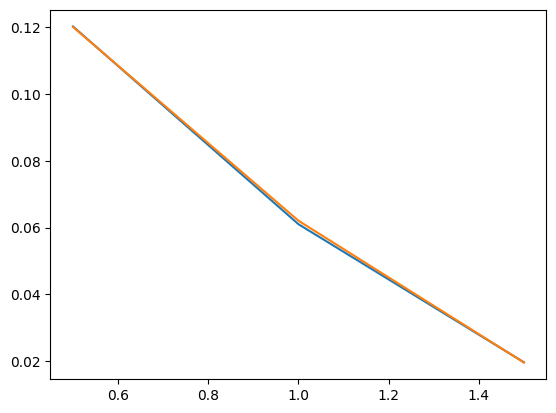

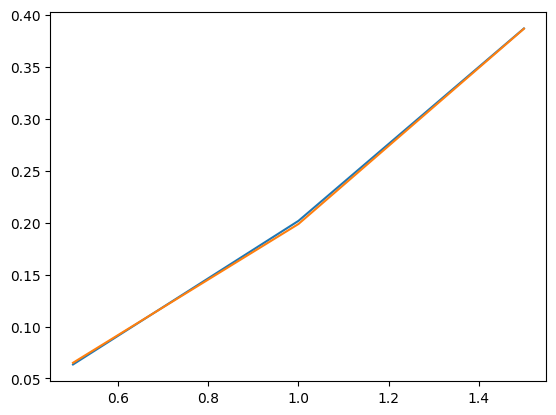

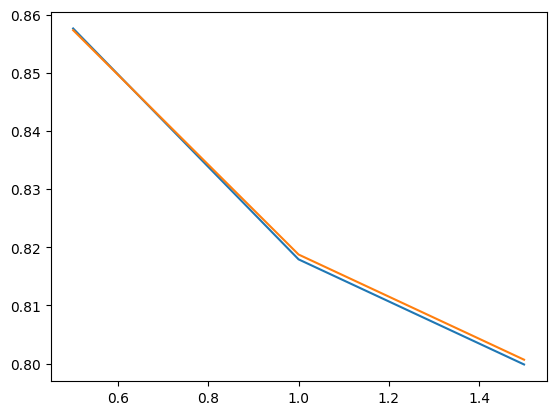

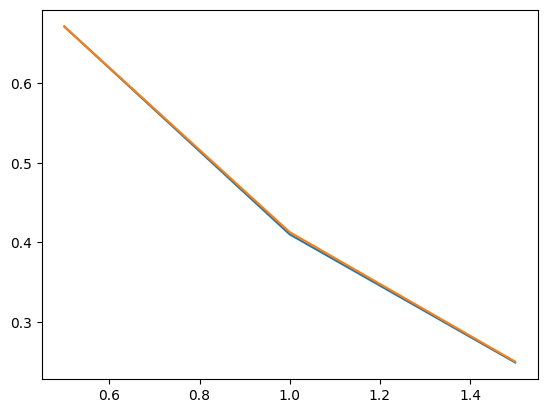

In [67]:
import matplotlib.pyplot as plt

for i,name in enumerate(["NSS","IG","MSE","SIM","CC"]):
    lst = [df_i_05_res[name].mean(),df_i_10_res[name].mean(),df_i_15_res[name].mean()]
    lst2 = [df_c_05_res[name].mean(),df_c_10_res[name].mean(),df_c_15_res[name].mean()]
    val = [0.5,1,1.5]
    plt.plot(val,lst)
    plt.plot(val,lst2)
    plt.show()

### VGG

In [69]:
df_c_05_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df_c_10_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_1.csv")
df_c_15_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_1_5.csv")

In [70]:
df_i_05_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_0_5.csv")
df_i_10_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1.csv")
df_i_15_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1_5.csv")

NSS

IG

MSE

SIM

CC



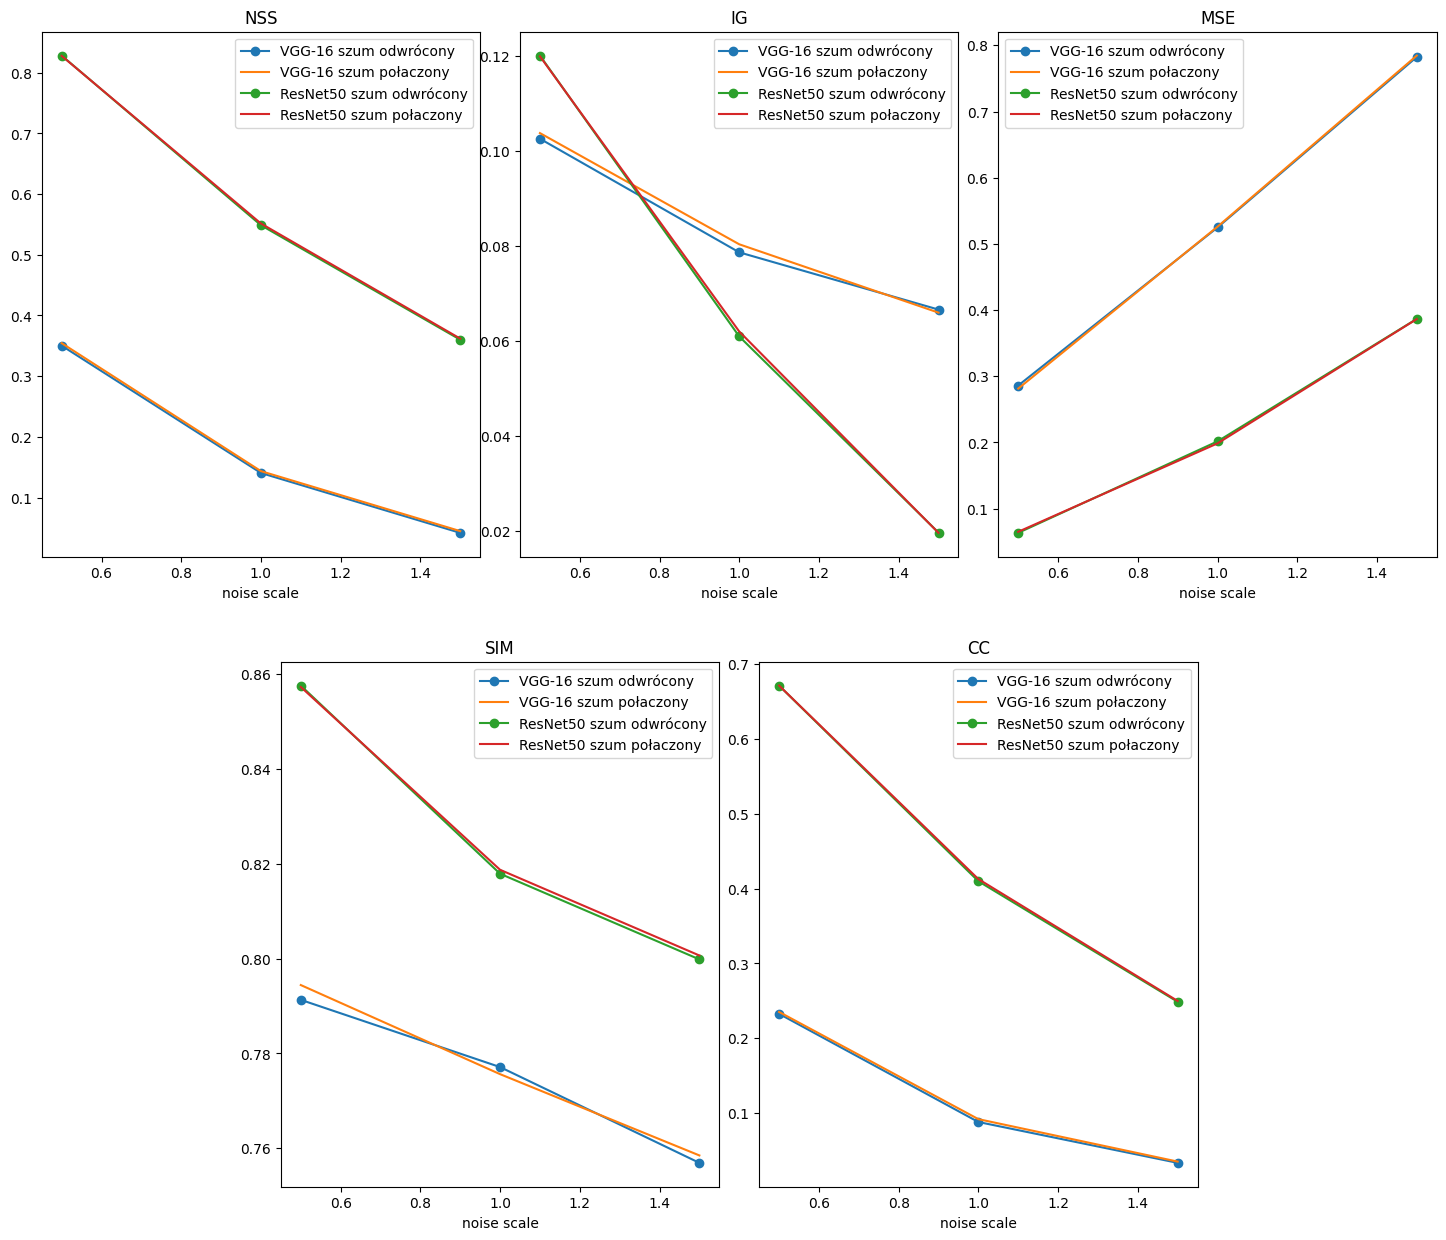

In [116]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
fig.set_size_inches(18,15)
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

ax = [0,0,0,0,0]

ax[0] = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax[1] = fig.add_subplot(spec[0,2:4])
ax[2] = fig.add_subplot(spec[0,4:])
ax[3] = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax[4] = fig.add_subplot(spec[1,3:5])

for i,name in enumerate(["NSS","IG","MSE","SIM","CC"]):
    lst = [df_i_05_VGG[name].mean(),df_i_10_VGG[name].mean(),df_i_15_VGG[name].mean()]
    lst2 = [df_c_05_VGG[name].mean(),df_c_10_VGG[name].mean(),df_c_15_VGG[name].mean()]
    val = [0.5,1,1.5]
    print(name)
    print()
    ax[i].set_title(name)
    ax[i].plot(val,lst, 'o-', label = "VGG-16 szum odwrócony")
    ax[i].plot(val,lst2, label = "VGG-16 szum połaczony")
    lst = [df_i_05_res[name].mean(),df_i_10_res[name].mean(),df_i_15_res[name].mean()]
    lst2 = [df_c_05_res[name].mean(),df_c_10_res[name].mean(),df_c_15_res[name].mean()]
    val = [0.5,1,1.5]
    ax[i].plot(val,lst,'o-', label = "ResNet50 szum odwrócony")
    ax[i].plot(val,lst2, label = "ResNet50 szum połaczony")
    ax[i].set_xlabel("noise scale")
    ax[i].legend()

plt.show()